In [1]:
!pip install opencv-python


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from matplotlib import pyplot as plt
import PIL
import os
import cv2
import shutil
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [3]:
data_dir="C:\\Users\\Viraj Sawant\\Desktop\\ML project\\IND_and_NEP"

# Data Preprocessing

In [4]:
image_generator=ImageDataGenerator(rescale=1./255)

In [5]:
image_data=image_generator.flow_from_directory(
data_dir,target_size=(224,224),
    batch_size=32,
)

Found 12240 images belonging to 6 classes.


In [6]:
# for i, (image, label) in enumerate(image_data):
#     print(i, label)

In [7]:
import pathlib

In [8]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP')

In [9]:
import glob
list(data_dir.glob("*/*.jpg"))

[WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-1.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-10.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-11.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-12.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-13.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-14.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-15.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023-02-19-08.30-1-16.jpg'),
 WindowsPath('C:/Users/Viraj Sawant/Desktop/ML project/IND_and_NEP/a_Good/BENGR_Good_2023

In [10]:
img_length=len(list(data_dir.glob("*/*.jpg")))
img_length

12240

In [11]:
quality_dict={
    "Good":list(data_dir.glob("a_Good/*")),
    "Moderate":list(data_dir.glob("b_Moderate/*")),
    "Unhealthy_Sensitive":list(data_dir.glob("c_Unhealthy_for_Sensitive_Groups/*")),
    "Unhealthy":list(data_dir.glob("d_Unhealthy/*")),
    "Very_Unhealthy":list(data_dir.glob("e_Very_Unhealthy/*")),
    "Severe":list(data_dir.glob("f_Severe/*")),
}

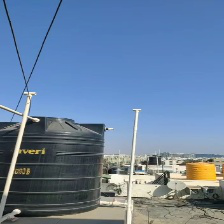

In [12]:
PIL.Image.open(quality_dict["Good"][112])

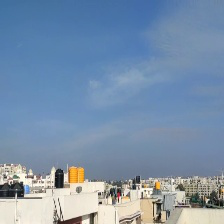

In [13]:
PIL.Image.open(quality_dict["Unhealthy_Sensitive"][67])

In [14]:
quality_dict_labels={
    "Good":0,
    "Moderate":1,
    "Unhealthy_Sensitive":2,
    "Unhealthy":3,
    "Very_Unhealthy":4,
    "Severe":5,
}

In [15]:
img=cv2.imread(str(quality_dict["Severe"][5]))
img.shape

(224, 224, 3)

# Model Training with Neural Network and Data Augmentation

In [16]:
X,y=[],[]
for qlty_type,qlty in quality_dict.items():
    print(qlty_type)
    print(len(qlty))

Good
1541
Moderate
1573
Unhealthy_Sensitive
2863
Unhealthy
2622
Very_Unhealthy
2194
Severe
1447


In [17]:
for qlty_type,qlty in quality_dict.items():
    for quality in qlty:
        _img=cv2.imread(str(quality))
        resize_img=cv2.resize(_img,(140,140))
        X.append(resize_img)
        y.append(quality_dict_labels[qlty_type])

In [18]:
X[5]

array([[[164, 119,  75],
        [166, 119,  75],
        [166, 119,  75],
        ...,
        [170, 121,  77],
        [170, 121,  77],
        [168, 119,  75]],

       [[164, 119,  75],
        [166, 119,  75],
        [166, 119,  75],
        ...,
        [171, 122,  78],
        [171, 122,  78],
        [168, 119,  76]],

       [[164, 119,  75],
        [166, 119,  75],
        [166, 119,  75],
        ...,
        [171, 122,  78],
        [171, 122,  78],
        [169, 120,  76]],

       ...,

       [[ 85,  82,  77],
        [103, 104,  97],
        [116, 121, 113],
        ...,
        [215, 227, 228],
        [214, 226, 226],
        [214, 227, 225]],

       [[ 51,  49,  40],
        [ 49,  46,  36],
        [ 53,  52,  39],
        ...,
        [214, 226, 226],
        [214, 226, 226],
        [214, 227, 225]],

       [[ 81,  77,  66],
        [ 82,  77,  63],
        [100,  95,  78],
        ...,
        [213, 226, 225],
        [212, 225, 223],
        [214, 225, 223]]

In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
len(X_train),len(X_test),len(y_train),len(y_test)

(8568, 3672, 8568, 3672)

## rescaling the X_train and X_test

In [22]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

In [23]:
X_train_scaled[3]

array([[[0.7372549 , 0.49019608, 0.25098039],
        [0.7372549 , 0.49019608, 0.25098039],
        [0.7372549 , 0.49411765, 0.25098039],
        ...,
        [0.74901961, 0.56078431, 0.37254902],
        [0.72156863, 0.55294118, 0.36078431],
        [0.70196078, 0.5372549 , 0.34509804]],

       [[0.7372549 , 0.49803922, 0.25490196],
        [0.7372549 , 0.49803922, 0.25490196],
        [0.7372549 , 0.49803922, 0.25490196],
        ...,
        [0.77647059, 0.6       , 0.41568627],
        [0.79215686, 0.62745098, 0.44313725],
        [0.70588235, 0.55686275, 0.36862745]],

       [[0.74117647, 0.50196078, 0.25490196],
        [0.74117647, 0.50196078, 0.25490196],
        [0.74117647, 0.50196078, 0.25490196],
        ...,
        [0.79607843, 0.63529412, 0.45490196],
        [0.81568627, 0.66666667, 0.48235294],
        [0.70196078, 0.56078431, 0.38039216]],

       ...,

       [[0.11372549, 0.08235294, 0.05882353],
        [0.10588235, 0.0745098 , 0.03921569],
        [0.1254902 , 0

## Data Augmentation

In [24]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.6),
    layers.experimental.preprocessing.RandomContrast(0.8),
    layers.experimental.preprocessing.RandomRotation(0.2),
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
])

In [25]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(6,activation="softmax")
])

model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

model.fit(X_train_scaled,y_train,epochs=3)

Epoch 1/3


C:\Users\Viraj Sawant\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


268/268 [==============================] - 285s 992ms/step - loss: 1.6630 - accuracy: 0.2908
Epoch 2/3
268/268 [==============================] - 265s 988ms/step - loss: 1.5457 - accuracy: 0.3591
Epoch 3/3
268/268 [==============================] - 253s 942ms/step - loss: 1.4773 - accuracy: 0.3974


In [29]:
model.evaluate(X_test_scaled,y_test)

115/115 [==============================] - 16s 134ms/step - loss: 1.3146 - accuracy: 0.4540


[1.314564824104309, 0.453976035118103]

In [30]:
prediction=model.predict(X_test_scaled)
prediction

115/115 [==============================] - 15s 128ms/step


array([[2.1444166e-01, 2.1727936e-01, 3.1537089e-01, 1.1277993e-01,
        7.9494134e-02, 6.0634058e-02],
       [1.4795832e-01, 1.3085185e-01, 3.0237320e-01, 2.1911563e-01,
        1.0776051e-01, 9.1940373e-02],
       [1.2575755e-01, 1.3475297e-01, 2.9899955e-01, 2.3898493e-01,
        1.2126878e-01, 8.0236286e-02],
       ...,
       [1.7074272e-01, 1.9744234e-01, 3.3748898e-01, 1.5542084e-01,
        8.5909083e-02, 5.2996002e-02],
       [2.8187522e-01, 5.5741709e-01, 1.5842584e-01, 6.3860754e-04,
        1.2785635e-03, 3.6472466e-04],
       [4.6832912e-02, 1.3033019e-01, 3.9972249e-01, 3.3652931e-01,
        6.6612795e-02, 1.9972358e-02]], dtype=float32)

In [34]:
score=tf.nn.softmax(prediction[66])
score

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.1369526 , 0.13622107, 0.14442514, 0.14181286, 0.28509232,
       0.15549603], dtype=float32)>

In [35]:
np.argmax(score)

4

In [36]:
y_test[66]

4

In [46]:
arr=prediction[:10]
arr=np.array(arr)

In [43]:
y_test[:10]

array([5, 1, 0, 1, 2, 2, 2, 2, 2, 0])